In [3]:
import pymc3 as pm
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import theano.tensor as tt

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
c:\Users\mpathirana\Anaconda3\envs\stat\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [4]:
y=np.array([0.25, 0.2365622342, 0.15630337, 0.6584035078, 0.9819810819, 1.0])
x=np.arange(1,y.shape[0]+1)

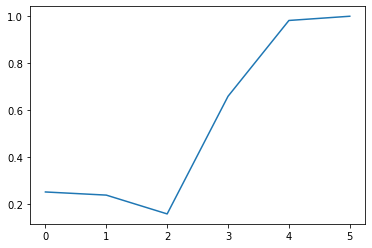

In [5]:
plt.plot(y)

In [6]:
y

array([0.25      , 0.23656223, 0.15630337, 0.65840351, 0.98198108,
       1.        ])

In [7]:
def exp_quad_kernel(x, knots, L=.01, r=.1):
    """exponentiated quadratic kernel"""
    x = tt.as_tensor_variable(x)
    knots = tt.as_tensor_variable(knots)
    L = tt.as_tensor_variable(L)
    r = tt.as_tensor_variable(r)
    
    distances = tt.pow(x.reshape((-1, 1)) - knots.reshape((1, -1)), 2)
    scaled_distances = distances / (2 * L ** 2)
    kernel_values = r ** 2 * tt.exp(-scaled_distances)
    
    return kernel_values

with pm.Model() as model:
    k = pm.DiscreteUniform('k', lower=1, upper=4)
    l = pm.Normal('l', mu=1, sd=10)
    r = pm.Normal('r', mu=.1, sd=10)
    L = pm.Normal('L',  mu=.01, sd=10)
    a=pm.InverseGamma('a',1)
    mu = pm.math.maximum(0,  1 / (1 + pm.math.exp( (k - x) / l)) )
    #cov = exp_quad_kernel(y,y,r=r,L=L)
    cov_func=r**2*pm.gp.cov.ExpQuad(1,ls=L)
    cov=cov_func(y.reshape(-1,1))+tt.eye(len(x))*a

    likelihood=pm.MvNormal('obs',mu, cov, observed=y)
    step = pm.NUTS(target_accept=1)
    trace=pm.sample(draws=750, tune=500)


    


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [k]
>NUTS: [a, L, r, l]
Sampling 4 chains, 0 divergences: 100%|██████████| 5000/5000 [2:41:13<00:00,  1.93s/draws]  
The number of effective samples is smaller than 25% for some parameters.
